# load library

In [1]:
source("r/jupyter_common.R")
source("r/identify_cell_types.R")
source("r/plot_sc_clusters.R")


In [2]:
# data structure
suppressPackageStartupMessages(library(data.table))

# single cell analysis
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(ArchR))


# parameters

In [3]:
str_condition <- "male-bc"

args <- list()
args$cancer_type <- "male-bc"
args$harmony_theta <- 0
str_column_of_meta_data_harmony <- sprintf("RNA_harmony_th.%s", paste(args$harmony_theta, collapse=","))

str_reduction <- "pca"
str_umap_reduction <- "umap"  
col_cluster_types <- "cluster.type"

if (args$harmony_theta >= 0) {
    str_column_of_meta_data_cluster <- str_column_of_meta_data_harmony
    str_reduction <- "harmony"
    str_umap_reduction <- "umapharmony"
    col_cluster_types <- "cluster.type.harmony"
}


str_column_of_meta_data_cluster
str_umap_reduction
col_cluster_types


figure_format <- "pdf"


[1] "RNA_harmony_th.0"

[1] "umapharmony"

[1] "cluster.type.harmony"

## set.seed

In [4]:
# set seed for reproducibility
set.seed(51)



## display

In [5]:
options(repr.matrix.max.cols=150, repr.matrix.max.rows=50)



# read scRNA-seq

In [6]:
dir_rna <- "/home/hkim77/francolab.w/sc-rna-seq/male-bc/run-20220725"
fname_rna <- sprintf("%s/output_male-bc/rds_male-bc/male-bc_sc-rna-seq_merged_seurat_obj.rds", dir_rna)

rna <- readRDS(fname_rna)


## pattern_cluster.type_removal

In [7]:
pattern_cluster.type_removal <- "1-|6-|8-"


## rna$type_normal_cancer

In [8]:
vec_cluster_types <- rna@meta.data[,col_cluster_types]
#table(vec_cluster_types)
rna$type_normal_cancer <- "Normal"
rna$type_normal_cancer[grepl("Epi", vec_cluster_types)] <- "Cancer"
rna$type_normal_cancer <- factor(rna$type_normal_cancer, level=c("Normal", "Cancer"))

# exclude
f.exclude <- grepl(pattern_cluster.type_removal, vec_cluster_types)
rna$type_normal_cancer[f.exclude] <- NA


# read scATAC-seq

In [9]:
dir_atac <- "/home/hkim77/francolab.w/sc-atac-seq/male-bc/run-20220725"
dir_output <- sprintf("%s/output_male-bc", dir_atac)
dir_output_p2g <- sprintf("%s/output_p2g_male-bc", dir_atac)
fname_atac <- sprintf("%s/rds/male-bc_archrproj_obj_final.rds", dir_output)

atac <- readRDS(fname_atac)


# normal vs. cancer

## df_p2g

In [10]:
peaktype <- "enhancer"

# all p2g
fname_rds <- sprintf("%s/rds/p2g.df.sub.plot_%s.rds", dir_output_p2g, peaktype)
filename_appendix <- ""

df_p2g <- readRDS(fname_rds)
head(df_p2g)
dim(df_p2g)

peaks_p2g <- unique(df_p2g$peakName)
n_upeaks_p2g <- length(peaks_p2g)

genes_p2g <- unique(df_p2g$geneName)
n_ugenes_p2g <- length(genes_p2g)

cat(sprintf("# unique peaks_p2g: %d\n", n_upeaks_p2g))
cat(sprintf("# unique genes: %d\n", n_ugenes_p2g))



,idxATAC,idxRNA,Correlation,FDR,VarQATAC,VarQRNA,EmpPval,EmpFDR,geneName,peakName,peakType,idx,kmeans
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,29,3,0.5394961,6.024423e-38,0.9396097,0.4338114,0.11278982,0.7965846,FAM41C,chr1:1079324-1079824,Distal,29-3,3
2,24,7,0.7894052,5.401495e-105,0.7539227,0.5385226,0.01994288,0.7892789,PLEKHN1,chr1:1068557-1069057,Distal,24-7,3
3,25,7,0.7349978,6.699672e-84,0.7787057,0.5385226,0.03031435,0.7892789,PLEKHN1,chr1:1069078-1069578,Distal,25-7,3
4,26,7,0.8462787,5.132060e-135,0.7508486,0.5385226,0.01255312,0.7892789,PLEKHN1,chr1:1069752-1070252,Distal,26-7,3
5,29,7,0.8539726,5.278697e-140,0.9396097,0.5385226,0.01176771,0.7892789,PLEKHN1,chr1:1079324-1079824,Distal,29-7,3
6,30,7,0.6868139,3.617362e-69,0.4759030,0.5385226,0.04307672,0.7892789,PLEKHN1,chr1:1080052-1080552,Distal,30-7,3


[1] 22869    13

# unique peaks_p2g: 11719
# unique genes: 7353


## df_p2g_epi

In [11]:
peaktype <- "enhancer"

# all epithelial cells
fname_rds <- sprintf("%s/rds/cancer_enriched_%s_p2g_table.rds", dir_output_p2g, peaktype)

df_p2g_epi <- readRDS(fname_rds)
head(df_p2g_epi)
dim(df_p2g_epi)

upeaks_epi <- unique(df_p2g_epi$peakName)
n_upeaks_epi <- length(upeaks_epi)

ugenes_epi <- unique(df_p2g_epi$geneName)
n_ugenes_epi <- length(ugenes_epi)

cat(sprintf("# unique peaks epi: %d\n", n_upeaks_epi))
cat(sprintf("# unique genes epi: %d\n", n_ugenes_epi))


,idxATAC,idxRNA,Correlation,FDR,VarQATAC,VarQRNA,EmpPval,EmpFDR,geneName,peakName,peakType,idx,kmeans
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,29,3,0.5394961,6.024423e-38,0.9396097,0.4338114,0.11278982,0.7965846,FAM41C,chr1:1079324-1079824,Distal,29-3,3
2,24,7,0.7894052,5.401495e-105,0.7539227,0.5385226,0.01994288,0.7892789,PLEKHN1,chr1:1068557-1069057,Distal,24-7,3
3,25,7,0.7349978,6.699672e-84,0.7787057,0.5385226,0.03031435,0.7892789,PLEKHN1,chr1:1069078-1069578,Distal,25-7,3
4,26,7,0.8462787,5.132060e-135,0.7508486,0.5385226,0.01255312,0.7892789,PLEKHN1,chr1:1069752-1070252,Distal,26-7,3
5,29,7,0.8539726,5.278697e-140,0.9396097,0.5385226,0.01176771,0.7892789,PLEKHN1,chr1:1079324-1079824,Distal,29-7,3
6,30,7,0.6868139,3.617362e-69,0.4759030,0.5385226,0.04307672,0.7892789,PLEKHN1,chr1:1080052-1080552,Distal,30-7,3


[1] 15275    13

# unique peaks epi: 6790
# unique genes epi: 3939


## df_p2g_cse

In [12]:
peaktype <- "enhancer"
fname_rds <- sprintf("%s/rds/cancer_specific_%s_p2g_table.rds", dir_output_p2g, peaktype)

df_p2g_cse <- readRDS(fname_rds)
head(df_p2g_cse)
dim(df_p2g_cse)

upeaks_cse <- unique(df_p2g_cse$peakName)
n_upeaks_cse <- length(upeaks_cse)

ugenes_cse <- unique(df_p2g_cse$geneName)
n_ugenes_cse <- length(ugenes_cse)

cat(sprintf("# unique peaks cse: %d\n", n_upeaks_cse))
cat(sprintf("# unique genes cse: %d\n", n_ugenes_cse))


,idxATAC,idxRNA,Correlation,FDR,VarQATAC,VarQRNA,EmpPval,EmpFDR,geneName,peakName,peakType,idx,kmeans
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,29,3,0.5394961,6.024423e-38,0.9396097,0.4338114,0.11278982,0.7965846,FAM41C,chr1:1079324-1079824,Distal,29-3,5
2,24,7,0.7894052,5.401495e-105,0.7539227,0.5385226,0.01994288,0.7892789,PLEKHN1,chr1:1068557-1069057,Distal,24-7,5
3,25,7,0.7349978,6.699672e-84,0.7787057,0.5385226,0.03031435,0.7892789,PLEKHN1,chr1:1069078-1069578,Distal,25-7,2
4,26,7,0.8462787,5.132060e-135,0.7508486,0.5385226,0.01255312,0.7892789,PLEKHN1,chr1:1069752-1070252,Distal,26-7,2
5,29,7,0.8539726,5.278697e-140,0.9396097,0.5385226,0.01176771,0.7892789,PLEKHN1,chr1:1079324-1079824,Distal,29-7,5
6,30,7,0.6868139,3.617362e-69,0.4759030,0.5385226,0.04307672,0.7892789,PLEKHN1,chr1:1080052-1080552,Distal,30-7,5


[1] 11551    13

# unique peaks cse: 5141
# unique genes cse: 3586


## df_p2g_normal

In [13]:
   
#comparision of non-epi vs. epi  
group_ref <- "non-Epi."
group1 <- "CSE"

# df_p2g_normal contain non-epithelial p2g
f <- which(!df_p2g$peakName %in% df_p2g_epi$peakName)
df_p2g_normal <- df_p2g[f,]

cat(sprintf("comparision of %s vs. %s\n", group_ref, group1))


head(df_p2g_normal)
dim(df_p2g_normal)

upeaks_normal <- unique(df_p2g_normal$peakName)
n_upeaks_normal <- length(upeaks_normal)

ugenes_normal <- unique(df_p2g_normal$geneName)
n_ugenes_normal <- length(ugenes_normal)

cat(sprintf("# unique peaks for %s: %d\n", group_ref, n_upeaks_normal))
cat(sprintf("# unique genes for %s: %d\n", group_ref, n_ugenes_normal))


comparision of non-Epi. vs. CSE


,idxATAC,idxRNA,Correlation,FDR,VarQATAC,VarQRNA,EmpPval,EmpFDR,geneName,peakName,peakType,idx,kmeans
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
77,22,17,0.6037769,1.453477e-49,0.6319305,0.4842678,0.07564391,0.7892789,TNFRSF4,chr1:1059422-1059922,Distal,22-17,1
121,77,31,0.5395152,5.981577e-38,0.8178778,0.6743580,0.11277696,0.7965691,CCNL2,chr1:1430153-1430653,Distal,77-31,5
124,77,33,0.6222581,2.030050e-53,0.8178778,0.3854527,0.06704292,0.7892789,ANKRD65,chr1:1430153-1430653,Distal,77-33,5
125,85,34,0.4932488,5.055257e-31,0.5334295,0.8695504,0.14746854,0.8112124,VWA1,chr1:1504831-1505331,Distal,85-34,5
132,119,49,0.6714273,4.744437e-65,0.8276508,0.8432451,0.04800736,0.7892789,GNB1,chr1:1906167-1906667,Distal,119-49,5
133,120,49,0.6480846,2.930064e-59,0.8340593,0.8432451,0.05638730,0.7892789,GNB1,chr1:1908914-1909414,Distal,120-49,5


[1] 7594   13

# unique peaks for non-Epi.: 4929
# unique genes for non-Epi.: 3551


In [14]:
ugenes_common <- intersect(ugenes_cse, ugenes_normal)
length(ugenes_common)


[1] 107

In [15]:
ugenes_cse_only <- setdiff(ugenes_cse, ugenes_normal)
length(ugenes_cse_only)


[1] 3479

In [16]:
ugenes_normal_only <- setdiff(ugenes_normal, ugenes_cse)
length(ugenes_normal_only)


[1] 3444

## barplot

### total # of genes linked with peaks

type_normal_cancer,geneCount
<fct>,<int>
non-Epi.,3551
CSE,3586


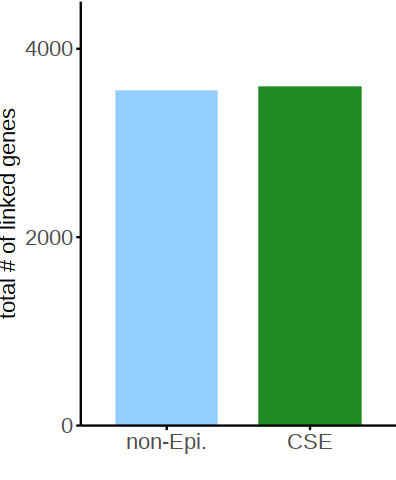

In [29]:

df_g <- data.frame(type_normal_cancer=factor(c(group_ref, group1), levels=c(group_ref, group1)),
            geneCount=c(
                n_ugenes_normal,
                n_ugenes_cse
            ))

df_g

nv_colors_normal_cancer <- c("#93CEFF", "forestgreen")
names(nv_colors_normal_cancer) <- c(group_ref, group1)

str_condition_plot <- sprintf("%s_%s-vs-%s_ngenes_linked%s", str_condition, group_ref, group1, filename_appendix)

gg <- print_ggpubr(df_g,
            x = "type_normal_cancer", y = "geneCount",
            color = "type_normal_cancer", 
            fill = "type_normal_cancer", 
            order_x = c(group_ref, group1),
            facet.by = NULL, facet.ncol = 5,
            plot_type = "barplot",
            #list_comparison = list(c("Normal", "Cancer")),
            #symnum.args = NULL,
            step.increase = 0.03, label.y = 1500, vjust = -0.4, tip.length = c(0.05, 0.05),
            test = NULL, test_label.x = 1, test_label.y = 1, test_vjust = 0.5,
            color_manual = nv_colors_normal_cancer,
            fill_manual = nv_colors_normal_cancer,
            ylimits = c(0, 4500),
            ybreaks = pretty(c(0, 6000), n = 4),
            yexpand = c(0, 0),
            yintercept = NULL,
            xlim = NULL, ylim = NULL,
            xlab = "", ylab = "total # of linked genes",
            angle = 0, font_size = 13,
            theme_style = "simple",
            width = 3.3, height = 4,
            str_condition_plot = str_condition_plot,
            n_log = 0)



###  num of genes per peak

#### df_summary.normal

In [18]:
dim(df_p2g_normal)

n_peaks_normal <- dim(df_p2g_normal)[1]
cat(sprintf("# peaks for %s: %d\n", group_ref, n_peaks_normal))

n_upeaks_normal <- length(unique(df_p2g_normal$peakName))
n_ugenes_normal <- length(unique(df_p2g_normal$geneName))
cat(sprintf("# unique peaks for %s: %d\n", group_ref, n_upeaks_normal))
cat(sprintf("# unique genes for %s: %d\n", group_ref, n_ugenes_normal))

df_summary <- df_p2g_normal %>% group_by(peakName) %>% dplyr::count(geneName)
df_summary <- df_summary[order(df_summary$n, decreasing=T),]
head(df_summary)
dim(df_summary)

df_summary <- df_p2g_normal %>% group_by(peakName) %>% 
                    dplyr::summarise(genes=paste(sort(unique(geneName)), collapse=", "),
                                     n = n_distinct(geneName))
df_summary.normal <- df_summary[order(df_summary$n, decreasing=T),]
head(df_summary.normal)
tail(df_summary.normal)
dim(df_summary.normal)
sum(df_summary.normal$n)
mean(df_summary.normal$n)


[1] 7594   13

# peaks for non-Epi.: 7594
# unique peaks for non-Epi.: 4929
# unique genes for non-Epi.: 3551


peakName,geneName,n
<chr>,<chr>,<int>
chr1:100292596-100293096,CDC14A,1
chr1:100621997-100622497,VCAM1,1
chr1:101111990-101112490,S1PR1,1
chr1:101161496-101161996,S1PR1,1
chr1:101181920-101182420,S1PR1,1
chr1:101242272-101242772,S1PR1,1


[1] 7594    3

peakName,genes,n
<chr>,<chr>,<int>
chr6:30500589-30501089,"ABCF1, ATAT1, C6orf136, DHX16, GNL1, HLA-E, MDC1, PPP1R18, TRIM39",9
chr11:64331686-64332186,"CCDC88B, DNAJC4, FERMT3, NUDT22, PLCB3, PRDX5, TRMT112, TRPT1",8
chr6:32794409-32794909,"HLA-DMA, HLA-DMB, HLA-DOA, HLA-DQA1, HLA-DQA2, HLA-DQB1, HLA-DQB2, HLA-DRB1",8
chr9:136642306-136642806,"CCDC183, EGFL7, INPP5E, LCN6, NOTCH1, RABL6, SEC16A, TRAF2",8
chr9:136644791-136645291,"CCDC183, EGFL7, INPP5E, LCN6, NOTCH1, RABL6, SEC16A, TRAF2",8
chr9:136646343-136646843,"CCDC183, EGFL7, INPP5E, LCN6, NOTCH1, RABL6, SEC16A, TRAF2",8


peakName,genes,n
<chr>,<chr>,<int>
chrX:48487219-48487719,SLC38A5,1
chrX:50838826-50839326,SHROOM4,1
chrX:68894918-68895418,STARD8,1
chrX:71871303-71871803,NHSL2,1
chrX:96436073-96436573,DIAPH2,1
chrX:96564612-96565112,DIAPH2,1


[1] 4929    3

[1] 7594

[1] 1.540678

#### df_summary.cse

In [19]:
dim(df_p2g_cse)

n_peaks_cse <- dim(df_p2g_cse)[1]
cat(sprintf("# peaks for %s: %d\n", group1, n_peaks_cse))

n_upeaks_cse <- length(unique(df_p2g_cse$peakName))
n_ugenes_cse <- length(unique(df_p2g_cse$geneName))
cat(sprintf("# unique peaks for %s: %d\n", group1, n_upeaks_cse))
cat(sprintf("# unique genes for %s: %d\n", group1, n_ugenes_cse))

df_summary <- df_p2g_cse %>% group_by(peakName) %>% dplyr::count(geneName)
df_summary <- df_summary[order(df_summary$n, decreasing=T),]
head(df_summary)
dim(df_summary)

df_summary <- df_p2g_cse %>% group_by(peakName) %>% 
                    dplyr::summarise(genes=paste(sort(unique(geneName)), collapse=", "),
                                     n = n_distinct(geneName))
df_summary.cse <- df_summary[order(df_summary$n, decreasing=T),]
head(df_summary.cse)
tail(df_summary.cse)
dim(df_summary.cse)
sum(df_summary.cse$n)
mean(df_summary.cse$n)


[1] 11551    13

# peaks for CSE: 11551
# unique peaks for CSE: 5141
# unique genes for CSE: 3586


peakName,geneName,n
<chr>,<chr>,<int>
chr1:10018448-10018948,CLSTN1,1
chr1:10018448-10018948,CTNNBIP1,1
chr1:10018448-10018948,LZIC,1
chr1:10018448-10018948,NMNAT1,1
chr1:1068557-1069057,ACAP3,1
chr1:1068557-1069057,AGRN,1


[1] 11551     3

peakName,genes,n
<chr>,<chr>,<int>
chr1:155124589-155125089,"ADAM15, CLK2, DCST1-AS1, DCST2, DPM3, EFNA1, EFNA3, EFNA4, FAM189B, FLAD1, HCN3, KRTCAP2, MTX1, MUC1, PMVK, PYGO2, RUSC1, RUSC1-AS1, SCAMP3, SLC50A1, ZBTB7B",21
chr16:1900082-1900582,"EME2, FAHD1, GFER, HAGH, JPT2, MEIOB, MRPS34, MSRB1, NDUFB10, NME3, NOXO1, NPW, NTHL1, NUBP2, PKD1, RPS2, SNHG9, SYNGR3, TBL3, TSC2, ZNF598",21
chr1:155117581-155118081,"ADAM15, CLK2, DCST1-AS1, DCST2, EFNA1, EFNA3, EFNA4, FAM189B, FLAD1, HCN3, KRTCAP2, MTX1, MUC1, PMVK, PYGO2, RUSC1, RUSC1-AS1, SCAMP3, SLC50A1, ZBTB7B",20
chr16:1935255-1935755,"EME2, FAHD1, GFER, HAGH, MRPS34, MSRB1, NDUFB10, NME3, NOXO1, NTHL1, NUBP2, PKD1, RPS2, SNHG19, SNHG9, SYNGR3, TBL3, TRAF7, TSC2, ZNF598",20
chr1:155222900-155223400,"ADAM15, CLK2, DCST1-AS1, DCST2, EFNA1, EFNA3, EFNA4, FAM189B, FLAD1, GBA, HCN3, KRTCAP2, LENEP, MTX1, MUC1, RUSC1, SCAMP3, SLC50A1, ZBTB7B",19
chr1:155224624-155225124,"ADAM15, CLK2, DCST1-AS1, DCST2, EFNA1, EFNA3, EFNA4, FAM189B, FLAD1, GBA, HCN3, KRTCAP2, MTX1, MUC1, RUSC1, SCAMP3, SLC50A1, ZBTB7B",18


peakName,genes,n
<chr>,<chr>,<int>
chrX:56920258-56920758,SPIN3,1
chrX:56946147-56946647,SPIN3,1
chrX:57643615-57644115,NLRP2B,1
chrX:68489963-68490463,YIPF6,1
chrX:74382625-74383125,SLC16A2,1
chrX:8067709-8068209,PNPLA4,1


[1] 5141    3

[1] 11551

[1] 2.246839

#### print

type_normal_cancer,geneCount
<fct>,<dbl>
non-Epi.,1.540678
CSE,2.246839


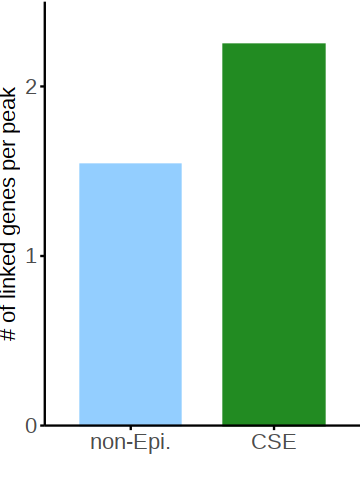

In [26]:

df_g <- data.frame(type_normal_cancer=factor(c(group_ref, group1), levels=c(group_ref, group1)),
            geneCount=c(
                mean(df_summary.normal$n),
                mean(df_summary.cse$n)
            ))

df_g

str_condition_plot <- sprintf("%s_%s-vs-%s_ngenes_linked_per_peak%s", str_condition,
                              group_ref, group1, filename_appendix)

gg <- print_ggpubr(df_g,
            x = "type_normal_cancer", y = "geneCount",
            color = "type_normal_cancer", 
            fill = "type_normal_cancer", 
            order_x = c(group_ref, group1),
            facet.by = NULL, facet.ncol = 5,
            plot_type = "barplot",
            #list_comparison = list(c("Normal", "Cancer")),
            #symnum.args = NULL,
            step.increase = 0.03, label.y = 2.75, vjust = -0.4, tip.length = c(0.05, 0.05),
            test = NULL, test_label.x = 1, test_label.y = 1, test_vjust = 0.5,
            color_manual = nv_colors_normal_cancer,
            fill_manual = nv_colors_normal_cancer,
            ylimits = c(0, 2.5),
            ybreaks = pretty(c(0, 2.5), n = 3),
            yexpand = c(0, 0),
            yintercept = NULL,
            xlim = NULL, ylim = NULL,
            xlab = "", ylab = "# of linked genes per peak",
            angle = 0, font_size = 13,
            theme_style = "simple",
            width = 3, height = 4,
            str_condition_plot = str_condition_plot,
            n_log = 0)
